In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import soundfile as sf
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

from IPython.display import Audio
from IPython.display import display

from ipywidgets import interactive, fixed

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/05_filtering_2/myfilter.py
from myfilter import myFilter                 # thanks Petr Palka !

# for the moment, this will be obscure (desinging a filter in a way I need), see later for analysis and explanation ;)
# filter that I want ... poles in +-0.9 exp(j pi/4), zeros in 1, j and -j ...
wantedpoles = [0.9*np.exp(1j * np.pi/4), 0.9*np.exp(-1j * np.pi/4)]
wantedzeros = [1, 1j, -1j]
B = np.poly(wantedzeros)
A = np.poly(wantedpoles)
print(wantedpoles,"\n",wantedzeros)
print(B,"\n",A)

def plot_spectrogram(f, t, sgr, name='', vmin=-160, ax=None):
    # Transfer to PSD
    sgr_log = 10 * np.log10(sgr + 1e-20)  # log(0) is undefined -> +1e-20 (add small value)

    if ax == None:
        fig = plt.figure(figsize=(20, 6))
        ax = fig.add_subplot(111)

    name = f'[{name}]' if name else ''
    ax.set_title("Spectogram " + name, pad=10)
    ax.set_xlabel('$t\ [s]$')
    ax.set_ylabel('$f\ [Hz]$', rotation=0, labelpad=42)
    ax.set_xlim(min(t), max(t))

    # pcolormesh of spectogram:
    cmesh = ax.pcolormesh(t, f, sgr_log, shading="gouraud", cmap=cm.inferno, vmin=vmin)
    cbar = plt.colorbar(cmesh, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('PSD\n$[dB]$', rotation=0, labelpad=30)
    plt.tight_layout()


--2024-10-23 06:15:40--  https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/05_filtering_2/myfilter.py
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fit.vut.cz/study/courses/ISS/public/NEW_PRED/05_filtering_2/myfilter.py [following]
--2024-10-23 06:15:41--  https://www.fit.vut.cz/study/courses/ISS/public/NEW_PRED/05_filtering_2/myfilter.py
Resolving www.fit.vut.cz (www.fit.vut.cz)... 147.229.9.65, 2001:67c:1220:809::93e5:941
Connecting to www.fit.vut.cz (www.fit.vut.cz)|147.229.9.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fit.vut.cz/study/course/ISS/public/NEW_PRED/05_filtering_2/myfilter.py [following]
--2024-10-23 06:15:42--  https://www.fit.vut.cz/study/course/ISS/public/NEW_PRED/05_filtering_2/myfilter.py

In [13]:
# >>>>>>>>>>>>>>>>> #demo_filtering <<<<<<<<<<<<<<<<<<<<<<<<<
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/NEW_PRED/05_filtering_2/music.wav
s, Fs = sf.read('music.wav')    # stereo, select only 8 secs ...
s = s[0:5*Fs]
display(Audio(s, rate=Fs))
plt.figure(figsize=(15,3))
plt.plot(s)
freq, time, sgr = spectrogram(s, Fs)
plot_spectrogram(freq, time, sgr)
ss = lfilter (B,A,s)
display(Audio(ss, rate=Fs))
freq, time, sgr = spectrogram(ss, Fs)
plot_spectrogram(freq, time, sgr)


Output hidden; open in https://colab.research.google.com to view.

<StemContainer object of 3 artists>

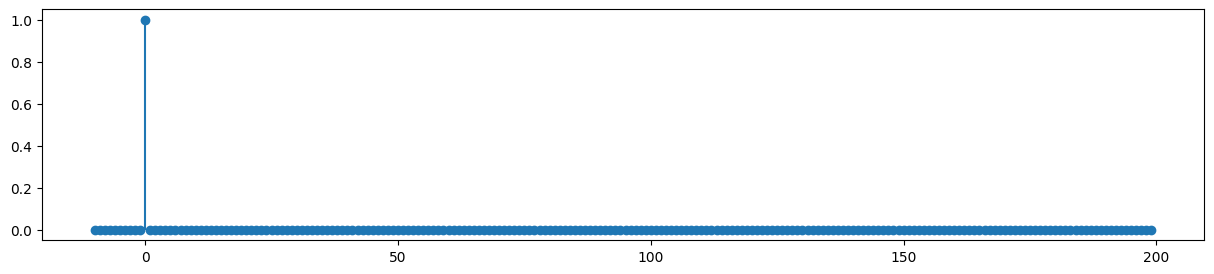

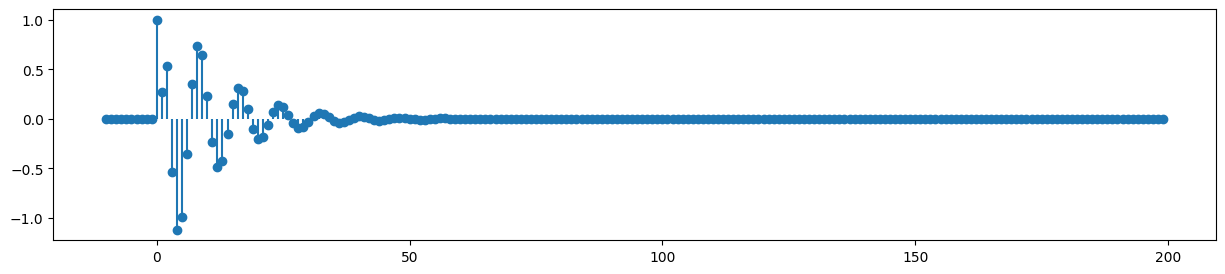

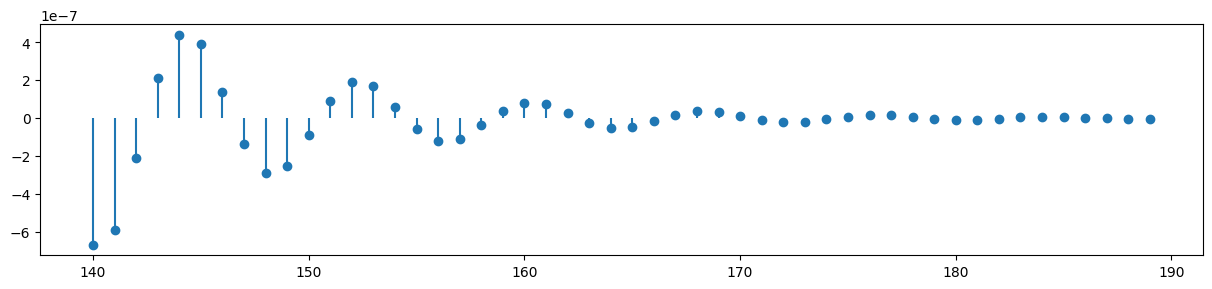

In [14]:
# >>>>>>>>>>>>>>>>> #iir_response <<<<<<<<<<<<<<<<<<<<<<<<<
n = np.arange(-10,200)
delta = np.zeros(n.shape)
delta[n==0] = 1
plt.figure(figsize=(15,3))
plt.stem(n,delta,basefmt=" ")
h = lfilter(B,A,delta)
plt.figure(figsize=(15,3))
plt.stem(n,h,basefmt=" ")
# zoom samples 150-200
plt.figure(figsize=(15,3))
plt.stem(n[150:200],h[150:200],basefmt=" ")

[ 1. -1.  1. -1.] [ 1.         -1.27279221  0.81      ]
[ 1. -1.  1. -1.] [ 1.         -1.27279221  0.81      ]


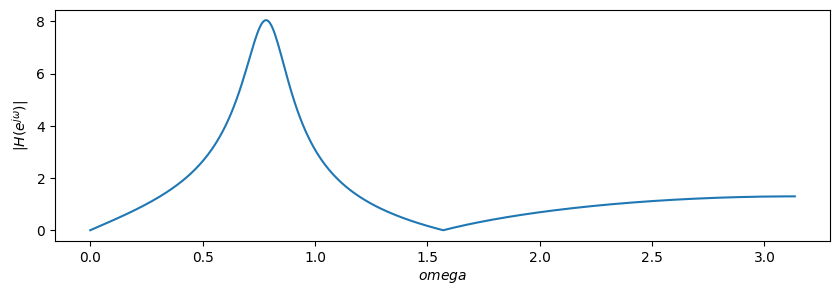

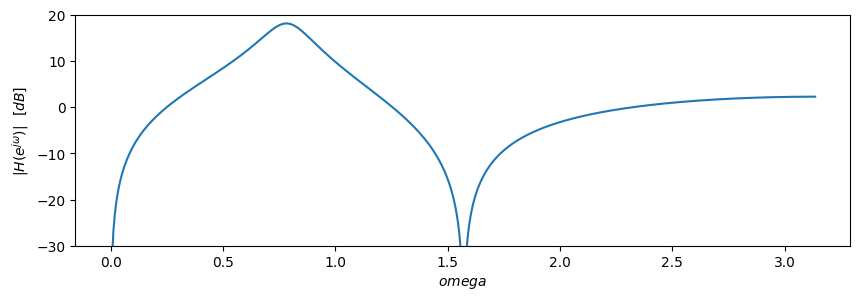

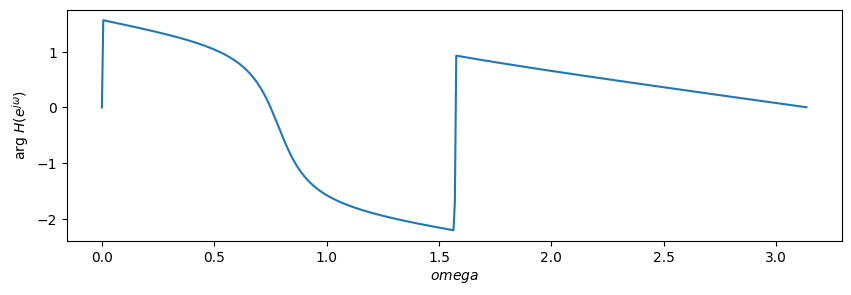

In [15]:
# >>>>>>>>>>>>>>>>> #freqz <<<<<<<<<<<<<<<<<<<<<<<<<
w, H = freqz(B, A)
print(B,A)
# magnitude
plt.figure(figsize=(10,3))
plt.plot(w, np.abs(H))
plt.gca().set_ylabel('$|H(e^{j\omega})|$')
plt.gca().set_xlabel('$omega$')
# magnitude in dB
Hdb = 10* np.log10 (np.real(H * np.conj(H)) + 1e-10)
plt.figure(figsize=(10,3))
plt.plot(w, Hdb)
plt.gca().set_ylabel('$|H(e^{j\omega})|~~ [dB]$')
plt.gca().set_xlabel('$omega$')
plt.gca().set_ylim(-30,20)
# phase
plt.figure(figsize=(10,3))
plt.plot(w, np.angle(H))
plt.gca().set_ylabel('arg $H(e^{j\omega})$')
plt.gca().set_xlabel('$omega$')
print(B, A)

Text(0.5, 0, '$f$')

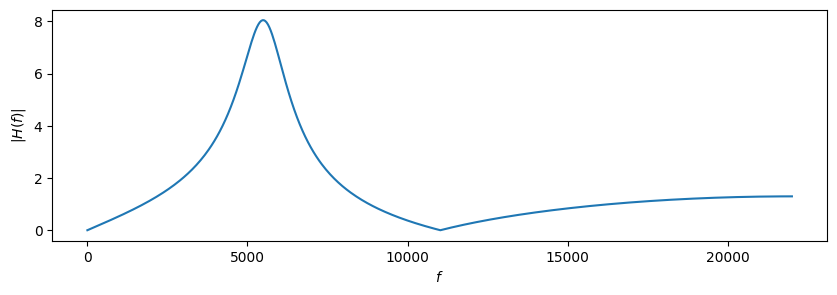

In [16]:
# magnitude - frequency axis in Hz
f = w / 2 / np.pi * Fs
plt.figure(figsize=(10,3))
plt.plot(f, np.abs(H))
plt.gca().set_ylabel('$|H(f)|$')
plt.gca().set_xlabel('$f$')

In [17]:
# >>>>>>>>>>>>>>>>> #roots <<<<<<<<<<<<<<<<<<<<<<<<<
polynomial = [1,2,1]
print(np.roots(polynomial))
polynomial = [1,-2,2]
print(np.roots(polynomial))

[-1. -1.]
[1.+1.j 1.-1.j]


In [18]:
# >>>>>>>>>>>>>>>>> #roots_our_filter <<<<<<<<<<<<<<<<<<<<<<<<<
ns = np.roots(B)
print(ns)
ps = np.roots(A)
print(ps)
print(np.abs(ps), np.angle(ps))

[1.00000000e+00+0.j 7.77156117e-16+1.j 7.77156117e-16-1.j]
[0.6363961+0.6363961j 0.6363961-0.6363961j]
[0.9 0.9] [ 0.78539816 -0.78539816]


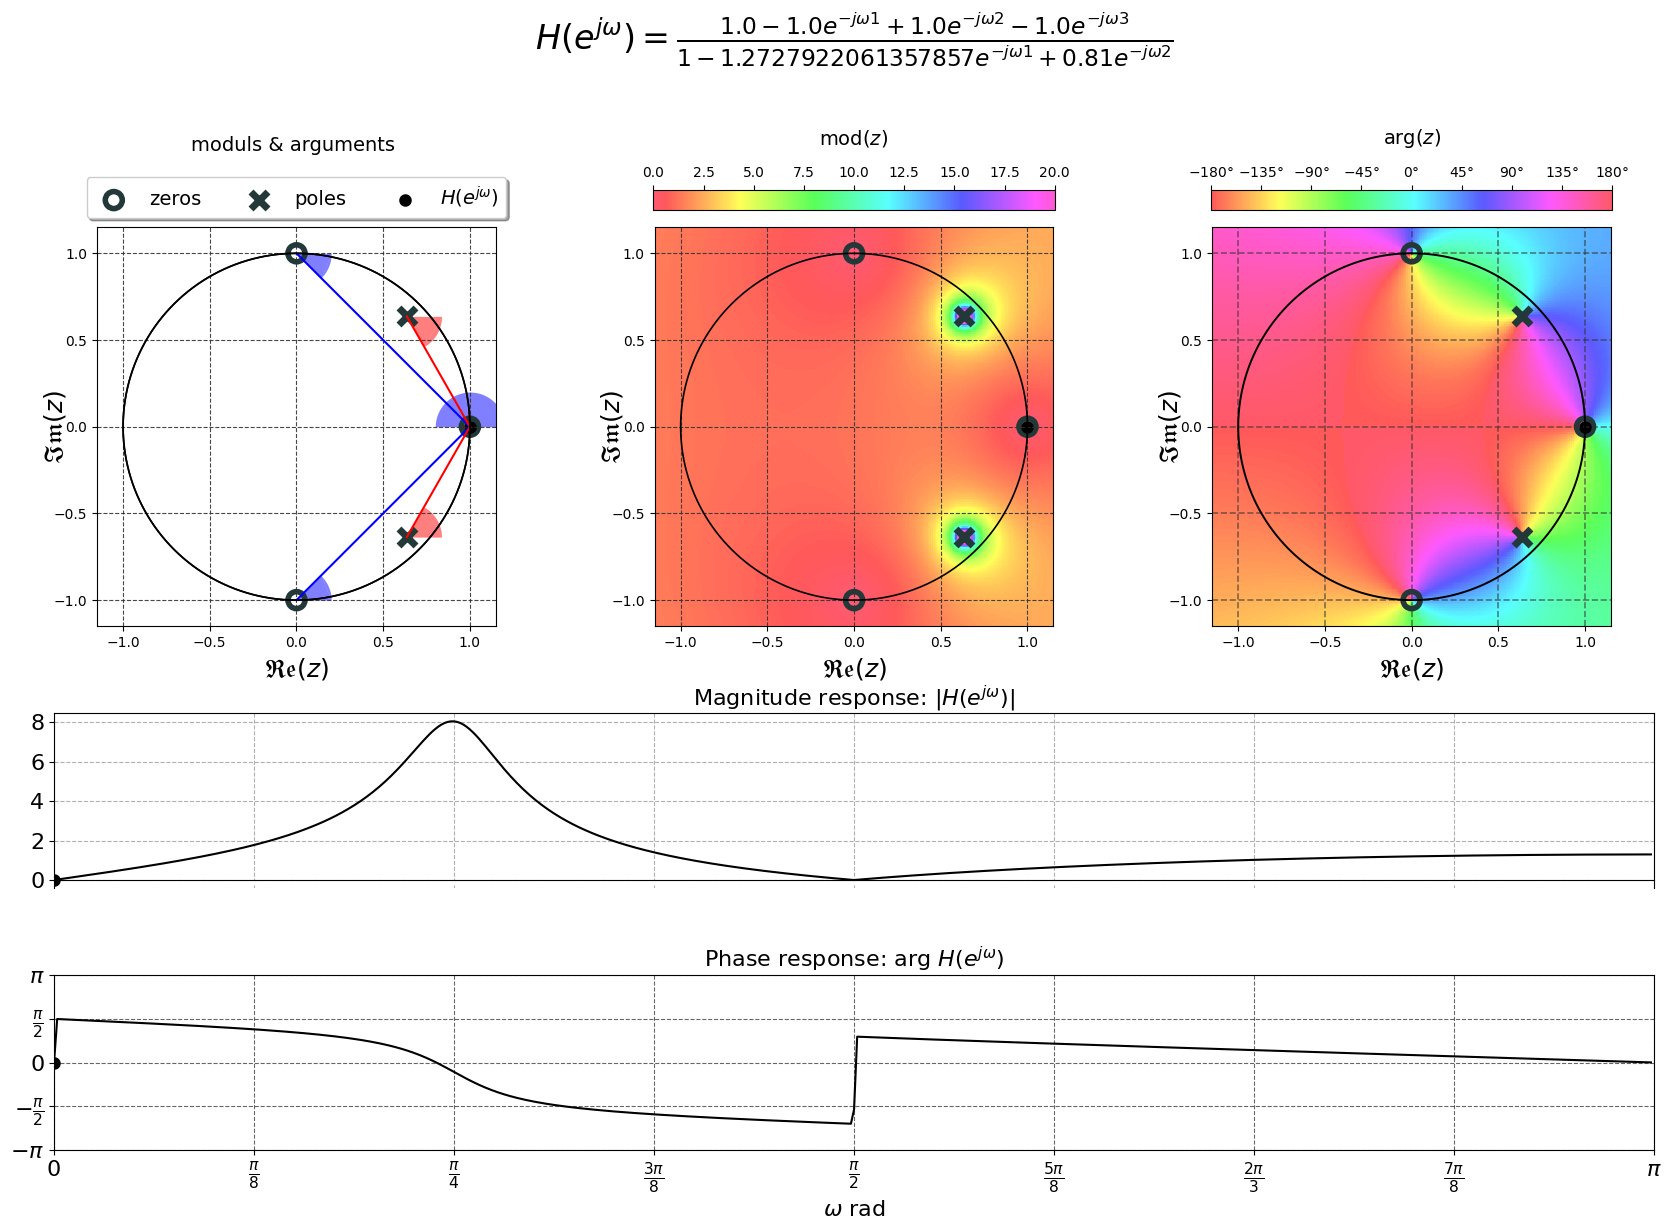

In [19]:
# >>>>>>>>>>>>>>>>> #zeros_poles_to_freq_response <<<<<<<<<<<<<<<<<<<<<<<<<
# demos by Petr Palka !
filter = myFilter(B, A)
filter.demo(0)

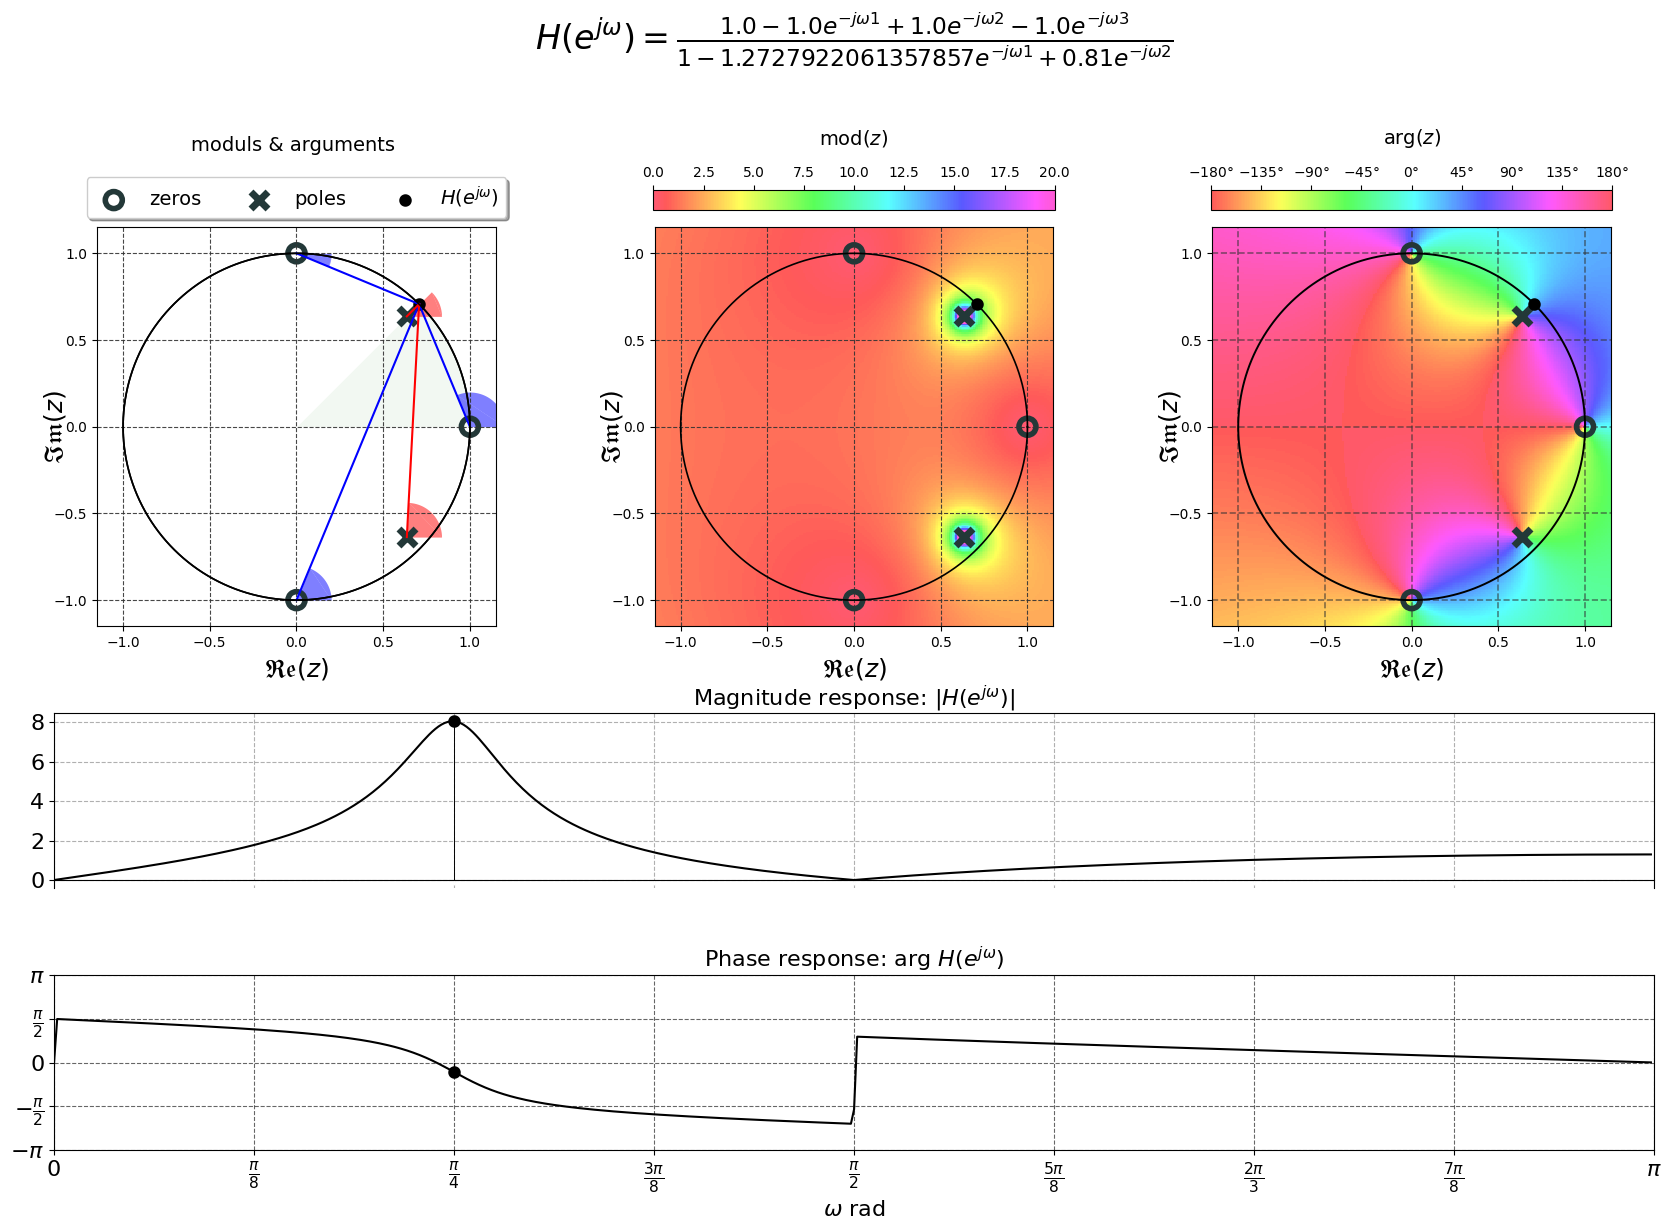

In [20]:
filter.demo(np.pi / 4)

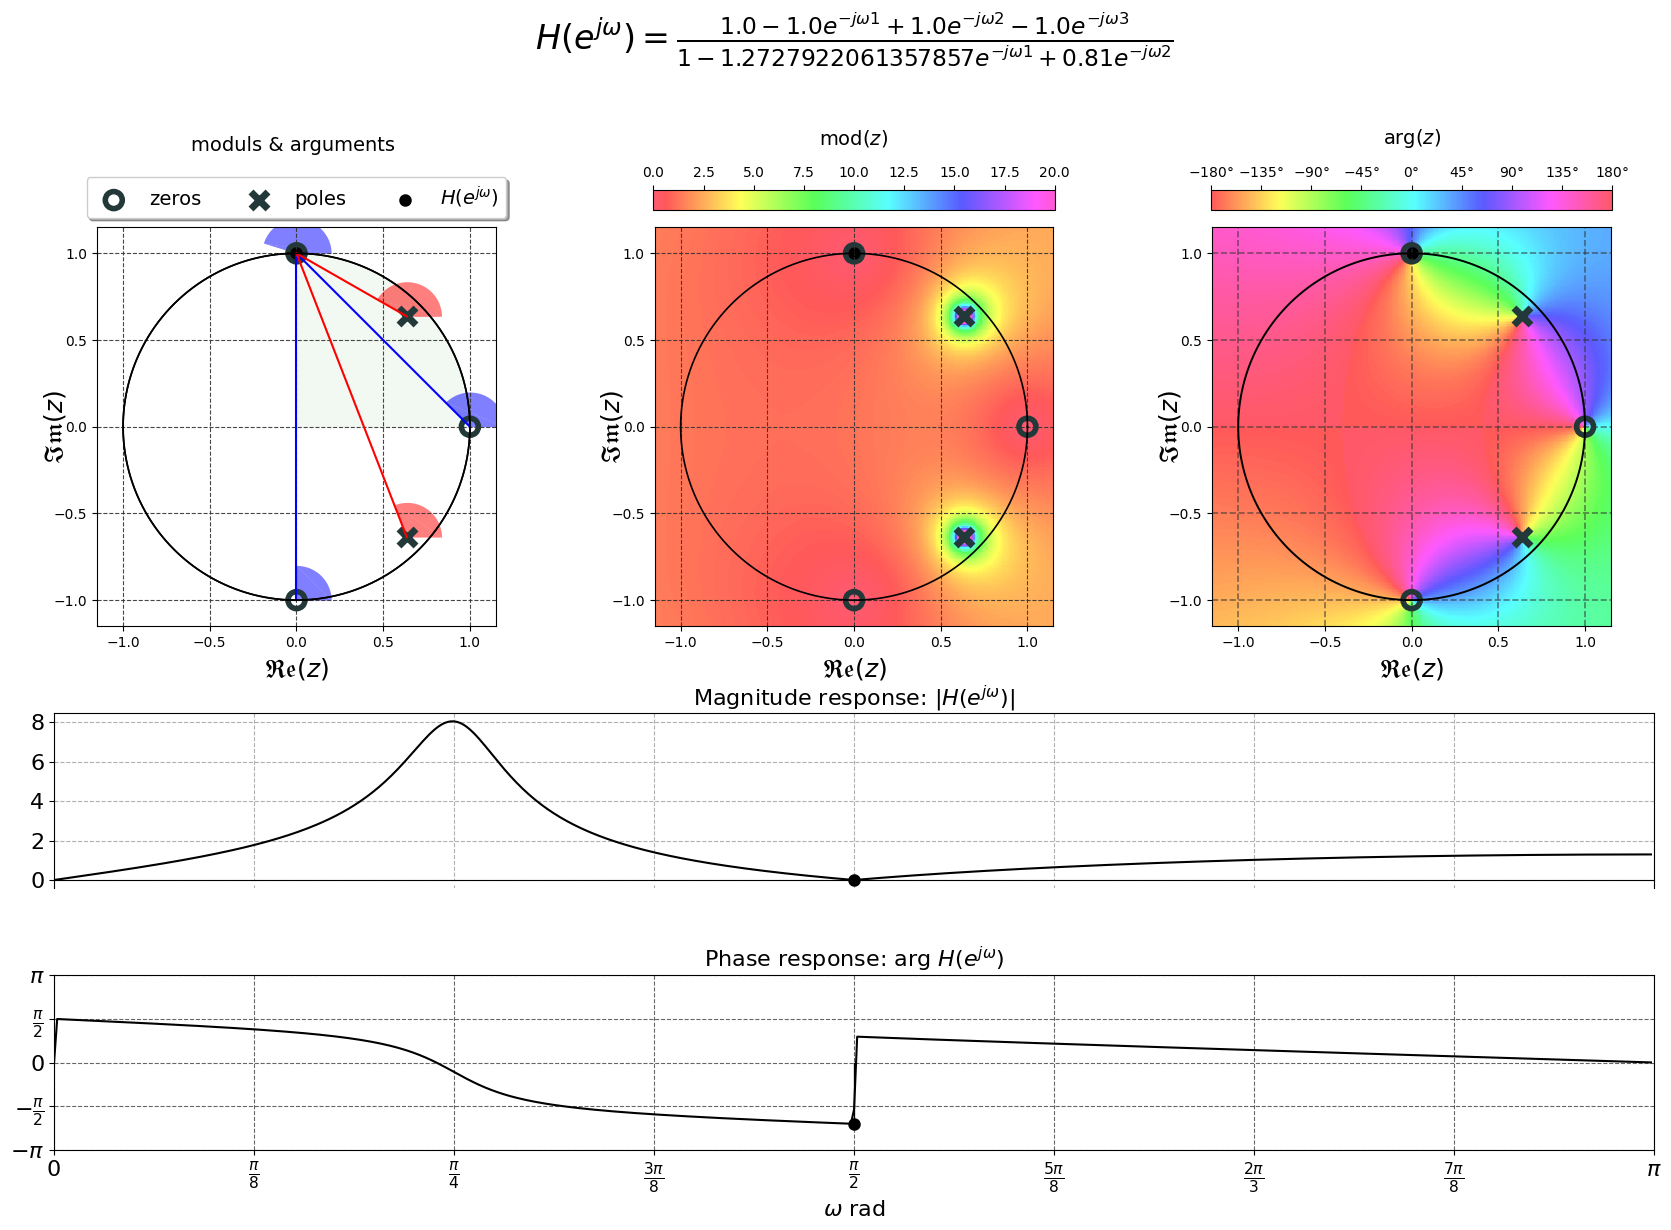

In [21]:
filter.demo(np.pi / 2)

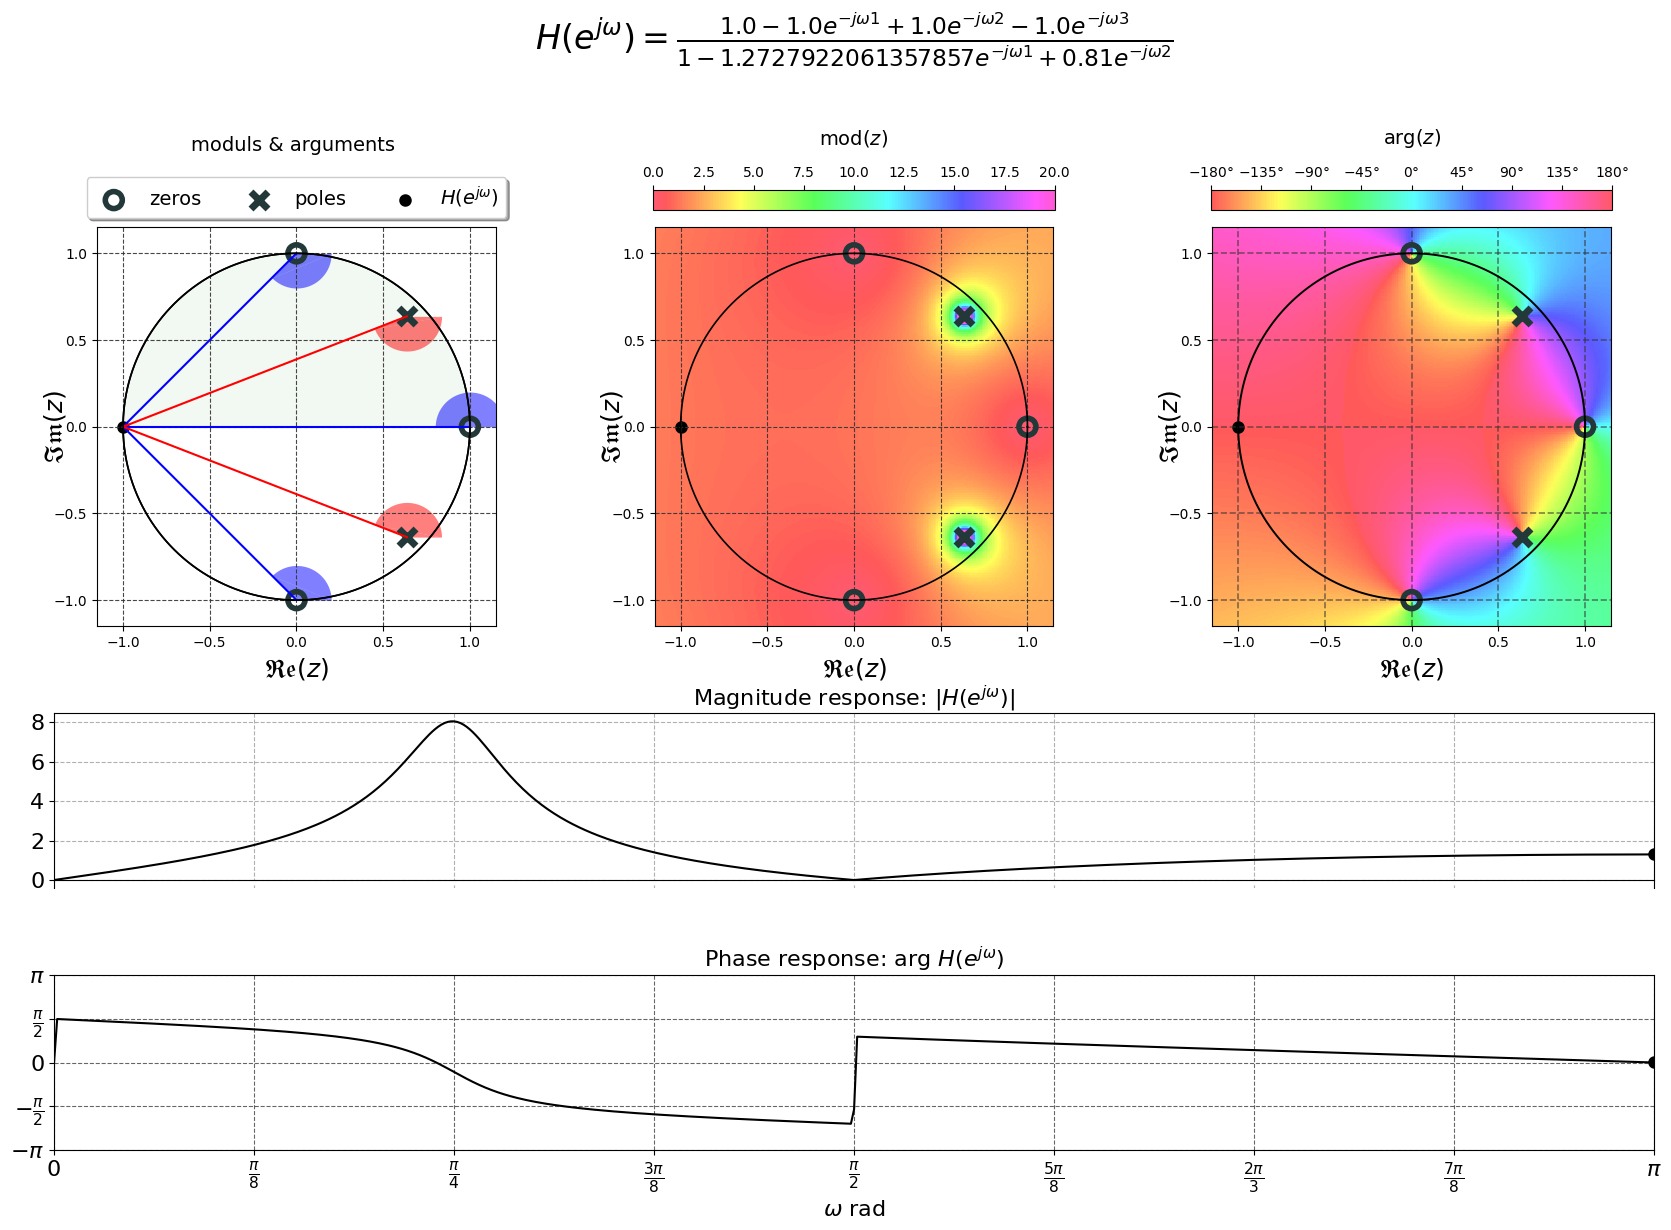

In [22]:
filter.demo(np.pi )